In [1]:
import pandas as pd 
import numpy as np 

import os

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns 
import missingno as msno 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_merged = pd.read_csv("../data/df_merged.csv")

In [10]:
len(df_merged.ID.unique())

21634

- There are total 21,634 patients.

- We have the outcome information of train and test patients in the train_outcome.csv and the test_outcome.csv.

In [15]:
train_outcome = pd.read_csv("../data/train_outcome.csv")
test_outcome = pd.read_csv("../data/test_outcome.csv")

In [17]:
outcome = pd.concat([test_outcome, train_outcome])

In [19]:
outcome.Outcome.value_counts()

0    18702
1     2932
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

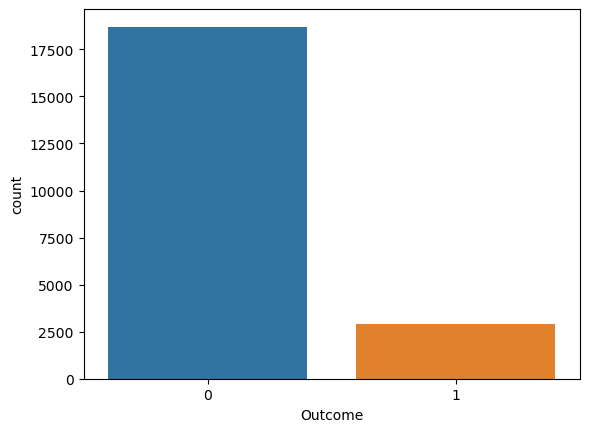

In [20]:
sns.countplot(x = outcome.Outcome)

- 13.5% patients out of total 21,634 patients have the sepsis.

In [24]:
print("Number of patients in the train data: ", train_outcome.shape[0])
print("Number of patients in the test data: ", test_outcome.shape[0])

Number of patients in the train data:  15144
Number of patients in the test data:  6490


Text(0.5, 1.0, 'Test set')

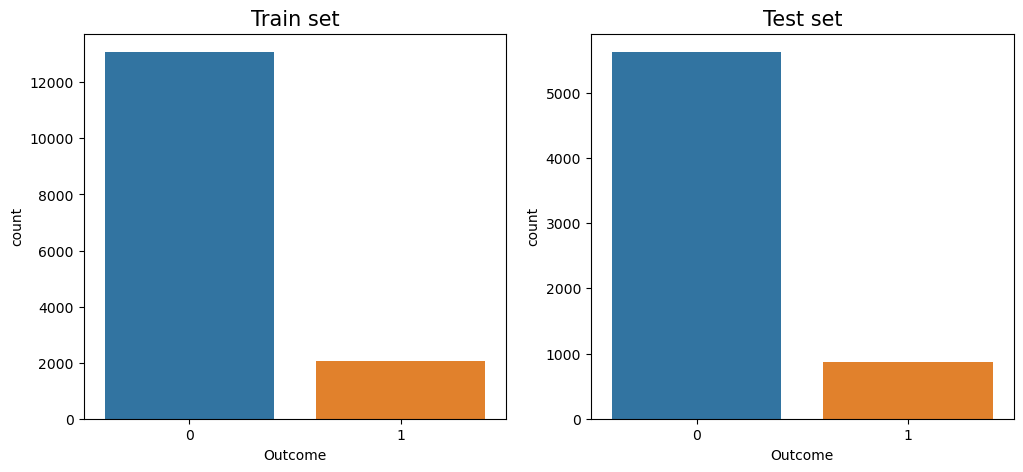

In [23]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = train_outcome.Outcome, ax = axes[0])
axes[0].set_title("Train set", fontsize = 15)

sns.countplot(x = test_outcome.Outcome, ax = axes[1])
axes[1].set_title("Test set", fontsize = 15)

- Train set and test set have the same sepsis ratio.
- We can see that the Outcome variable is very imbalance.
- So when we split the train set into train and validation set, we need the stratified sampling.

- Let's split the df_merged table into df_train and df_test tables by using the ID in the train_outcome and the test_outcome tables.

In [27]:
df_train = df_merged[df_merged.ID.isin(train_outcome.ID)]
df_test = df_merged[df_merged.ID.isin(test_outcome.ID)]

In [28]:
print("Train data shape: ", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape:  (568775, 41)
Test data shape:  (244402, 41)


- Save the tables.

In [29]:
df_train.to_csv("../data/df_train.csv", index = False)
df_test.to_csv("../data/df_test.csv", index = False)